In [11]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_excel('Messy data.xlsx')
df.head()

,ID,Name,Age,Email,JoinDate,Salary
0,1,Alice,25.0,alice@example.com,2020-01-01 00:00:00,50000.0
1,2,Bob,30.0,bob@example.com,not a date,60000.0
2,2,Bob,30.0,bob@example.com,2020-02-01 00:00:00,60000.0
3,4,Charlie,NaN,charlie@,2020-03-01 00:00:00,70000.0
4,5,David,22.0,NaN,2020-04-01 00:00:00,NaN


In [35]:
df.isnull()           # Returns True for missing values
df.isnull().sum()     # Count of missing values per column

ID          0
Name        1
Age         1
Email       1
JoinDate    0
Salary      1
dtype: int64

In [67]:
df.dtypes

ID            int64
Name         object
Age         float64
Email        object
JoinDate     object
Salary      float64
dtype: object

In [56]:
unique_values = df['Age'].unique()
unique_values

array([25., 30., nan, 22., 45., 50., 55., 60., 65.])

In [69]:
duplicates = df.duplicated()
df[duplicates]
df.drop_duplicates(inplace=True)

In [73]:
duplicates = data[data.duplicated()]  # Select only duplicated rows
print(duplicates)

Empty DataFrame
Columns: [ID,Name,Age,Email,JoinDate,Salary]
Index: []


In [81]:
missing_data = data.isnull().sum()
print("Missing Data")
missing_data

Missing Data


ID          0
Name        1
Age         1
Email       1
JoinDate    0
Salary      1
dtype: int64

In [35]:
import pandas as pd

print(df.head())

df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')
df['Email'] = df['Email'].astype(str)

print(df.dtypes)


   ID     Name   Age              Email   JoinDate   Salary
0   1    Alice  25.0  alice@example.com 2020-01-01  50000.0
1   2      Bob  30.0    bob@example.com        NaT  60000.0
2   2      Bob  30.0    bob@example.com 2020-02-01  60000.0
3   4  Charlie   NaN           charlie@ 2020-03-01  70000.0
4   5    David  22.0                nan 2020-04-01      NaN
ID                   int64
Name                object
Age                float64
Email               object
JoinDate    datetime64[ns]
Salary             float64
dtype: object


In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [63]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(df[["Salary"]])
df[["Salary"]] = imputer.transform(df[["Salary"]])
imputer = SimpleImputer(strategy="mean")
imputer.fit(df[["Age"]])
df[["Age"]] = imputer.transform(df[["Age"]])


In [69]:
df.dtypes

ID                   int64
Name                object
Age                  int32
Email               object
JoinDate    datetime64[ns]
Salary               int32
dtype: object

In [67]:
df["Salary"] = df["Salary"].astype(int)
df["Age"] = df["Age"].astype(int)

In [1]:
import pandas as pd

In [94]:
data={
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "age": [25, 30, 28, 35],
    "ID": [101, 102, 103, 104], 
    "salary": [50000, 60000, 55000, 70000],
    "email": ["alice@example.com", "bob@example.com", "charlie@example.com", "david@example.com"],
    "department": ["HR", "IT", "Finance", "Marketing"],  
    "joining_date": ["2021-05-10", "2019-08-22", "2020-11-15", "2018-04-30"],  
    "experience": [3, 5, 4, 7],  
}


In [125]:
df = pd.DataFrame(data)
df

,Month,Region,Sales
0,Jan,North,100
1,Jan,South,150
2,Feb,North,120
3,Feb,South,130
4,Mar,North,140
5,Mar,South,170


In [53]:
data2 = {
    "ID": [103, 104, 105, 106],
    "Name": ["Alice", "Bob", "Charlie", "David"],# Notice IDs 105 & 106 are extra
    "salary": [55000, 70000, 45000, 48000],
    "email": ["charlie@example.com", "david@example.com", "eve@example.com", "frank@example.com"]
}
num_col='salary'
df2=pd.DataFrame(data2)
df2


,ID,Name,salary,email
0,103,Alice,55000,charlie@example.com
1,104,Bob,70000,david@example.com
2,105,Charlie,45000,eve@example.com
3,106,David,48000,frank@example.com


In [106]:
df_inner = pd.merge(df,df2, on="Name", how="inner")
df_inner.head()

,Name,age,ID_x,salary_x,email_x,department,joining_date,experience,ID_y,salary_y,email_y
0,Alice,25,101,50000,alice@example.com,HR,2021-05-10,3,103,55000,charlie@example.com
1,Bob,30,102,60000,bob@example.com,IT,2019-08-22,5,104,70000,david@example.com
2,Charlie,28,103,55000,charlie@example.com,Finance,2020-11-15,4,105,45000,eve@example.com
3,David,35,104,70000,david@example.com,Marketing,2018-04-30,7,106,48000,frank@example.com


In [90]:
df.columns

Index(['cat_column', 'num_column_1', 'num_column_2'], dtype='object')

In [35]:
df_combined = pd.concat([df,data2], ignore_index=True)
print(df_combined)

      Name   age   ID  salary                email department joining_date  \
0    Alice  25.0  101   50000    alice@example.com         HR   2021-05-10   
1      Bob  30.0  102   60000      bob@example.com         IT   2019-08-22   
2  Charlie  28.0  103   55000  charlie@example.com    Finance   2020-11-15   
3    David  35.0  104   70000    david@example.com  Marketing   2018-04-30   
4      NaN   NaN  103   55000  charlie@example.com        NaN          NaN   
5      NaN   NaN  104   70000    david@example.com        NaN          NaN   
6      NaN   NaN  105   45000      eve@example.com        NaN          NaN   
7      NaN   NaN  106   48000    frank@example.com        NaN          NaN   

   experience  
0         3.0  
1         5.0  
2         4.0  
3         7.0  
4         NaN  
5         NaN  
6         NaN  
7         NaN  


In [37]:
cross_tab= pd.crosstab(df["department"], df["experience"])

In [39]:
print(cross_tab)

experience  3  4  5  7
department            
Finance     0  1  0  0
HR          1  0  0  0
IT          0  0  1  0
Marketing   0  0  0  1


In [41]:
counts = df["salary"].value_counts()
print(counts)

salary
50000    1
60000    1
55000    1
70000    1
Name: count, dtype: int64


In [45]:
counts=df["salary"].value_counts(normalize=True)
counts

salary
50000    0.25
60000    0.25
55000    0.25
70000    0.25
Name: proportion, dtype: float64

In [49]:
grouped_var = df.groupby("department")["salary"].mean()
grouped_var

department
Finance      55000.0
HR           50000.0
IT           60000.0
Marketing    70000.0
Name: salary, dtype: float64

In [51]:
print(df.describe())

             age          ID        salary  experience
count   4.000000    4.000000      4.000000    4.000000
mean   29.500000  102.500000  58750.000000    4.750000
std     4.203173    1.290994   8539.125638    1.707825
min    25.000000  101.000000  50000.000000    3.000000
25%    27.250000  101.750000  53750.000000    3.750000
50%    29.000000  102.500000  57500.000000    4.500000
75%    31.250000  103.250000  62500.000000    5.500000
max    35.000000  104.000000  70000.000000    7.000000


In [92]:
data3= {
    "cat_column": ["A", "B", "A", "C", "B", "A", "C"],
    "num_column_1": [10, 20, 15, 25, 30, 12, 27],
    "num_column_2": [100, 200, 150, 250, 300, 120, 270]
}
df3 = pd.DataFrame(data3)
pivot_table = df.pivot_table(index="cat_column", 
                             values=["num_column_1", "num_column_2"], 
                             aggfunc={"cat_column": "count", 
                                      "num_column_1": "mean", 
                                      "num_column_2": "mean"})
pivot_table = pivot_table.rename(columns={"cat_column": "new_cat_column", 
                                          "num_column_1": "new_num_column_1", 
                                          "num_column_2": "new_num_column_2"})

print(pivot_table)

            new_cat_column  new_num_column_1  new_num_column_2
cat_column                                                    
A                        3         12.333333        123.333333
B                        2         25.000000        250.000000
C                        2         26.000000        260.000000


In [55]:
df.dtypes

cat_column      object
num_column_1     int64
num_column_2     int64
dtype: object

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Subscription': ['Basic', 'Premium', 'Premium', 'Basic', 'Basic', 'Premium', 'Premium', 'Basic']
})


In [43]:
cross_tab = pd.crosstab(data['Gender'], data['Subscription'])
print(cross_tab)

Subscription  Basic  Premium
Gender                      
Female            2        2
Male              2        2


<Figure size 600x400 with 0 Axes>

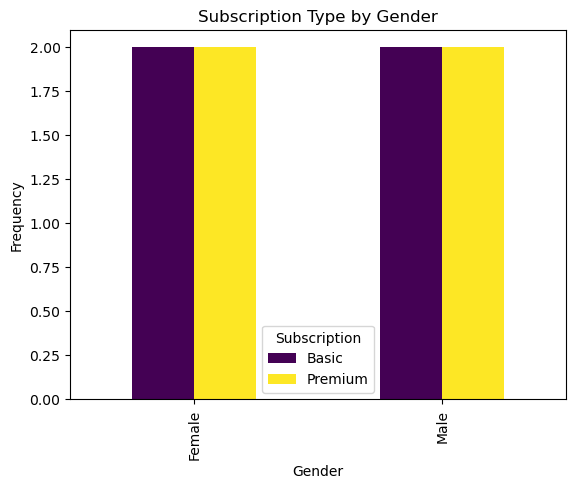

In [45]:
plt.figure(figsize=(6,4))  
cross_tab.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Subscription Type by Gender')  
plt.xlabel('Gender')  
plt.ylabel('Frequency')  
plt.legend(title='Subscription')  
plt.show()  

In [67]:
data4 = pd.DataFrame({
    'Salary': [45000, 55000, 48000, 70000, 62000, 58000, 75000, 43000, 69000, 52000]
})

num_col = 'Salary'  # The numeric column to analyze

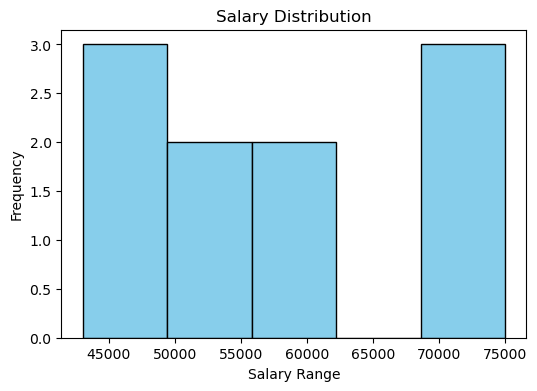

In [69]:
plt.figure(figsize=(6,4))  # Set figure size
data[num_col].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')  # Histogram plot
plt.title('Salary Distribution')  # Title
plt.xlabel('Salary Range')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the plot

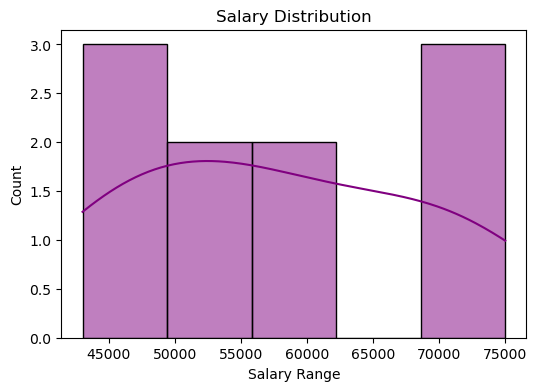

In [71]:
plt.figure(figsize=(6,4))  # Set figure size
sns.histplot(data[num_col], bins=5, kde=True, color='purple')  # Seaborn histogram with KDE (Density curve)
plt.title('Salary Distribution')  # Title
plt.xlabel('Salary Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()  # Display the plot

In [73]:
labels = ['HR', 'Finance', 'IT', 'Marketing']
percentage = [20, 30, 35, 15] 

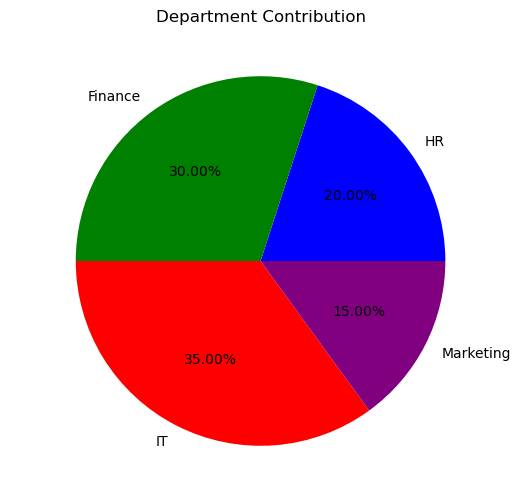

In [113]:
plt.figure(figsize=(6, 6))
plt.pie(percentage,labels=labels, autopct='%1.2f%%',colors=['blue', 'green', 'red', 'purple'])
plt.title('Department Contribution') 
plt.ylabel(' ')
plt.show()

In [99]:
data = pd.DataFrame({
    'Month': ['Jan', 'Jan', 'Feb', 'Feb', 'Mar', 'Mar'],
    'Region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'Sales': [100, 150, 120, 130, 140, 170]
})

In [101]:
group_by = data.groupby('Month')['Sales'].sum()

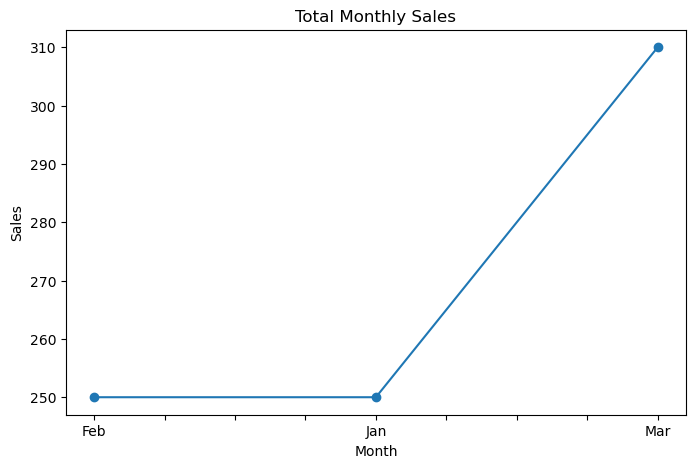

In [161]:
plt.figure(figsize=(8, 5))
group_by.plot(kind='line', marker='o')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [155]:
data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5, 6, 7],
    'Churn': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
})

In [157]:
freq_churned = data['Churn'].value_counts()

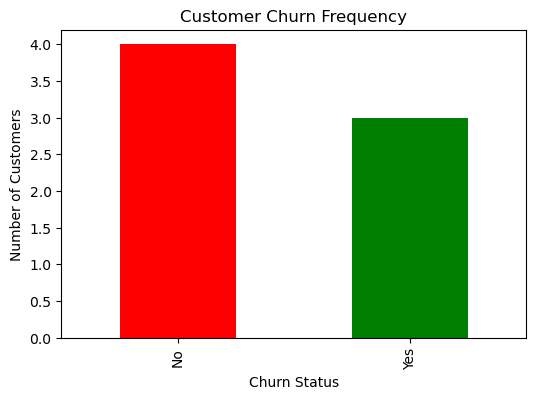

In [159]:
plt.figure(figsize=(6, 4))
freq_churned.plot(kind='bar', color=['red', 'green'])
plt.title('Customer Churn Frequency')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()